In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 데이터 로드
data = pd.read_csv('./data/athena_pre.csv')

## 출발 도착 시간에 따른 항공권 수

In [14]:


# 그룹화 및 정렬
df = data.groupby(['partition_0', 'partition_1', 'dep_sdt_hours'])['dep_week'].count().reset_index().sort_values(['partition_1', 'dep_sdt_hours'])
df.columns = ['partition_0', 'partition_1', 'hours', 'cnt']

# 가능한 모든 시간을 포함하는 리스트 생성
hours = np.arange(0, 24.5, 0.5)

# partition_0과 partition_1의 고유한 조합 추출
unique_combinations = data[['partition_0', 'partition_1']].drop_duplicates()

# 가능한 모든 조합을 포함하는 데이터프레임 생성
full_combinations_list = []
for _, row in unique_combinations.iterrows():
    for hour in hours:
        full_combinations_list.append({'partition_0': row['partition_0'], 'partition_1': row['partition_1'], 'hours': hour})

full_combinations = pd.DataFrame(full_combinations_list)

# 병합 및 누락된 값을 0으로 채움
merged_df = pd.merge(full_combinations, df, on=['partition_0', 'partition_1', 'hours'], how='left').fillna(0)

# 'cnt' 열을 정수형으로 변환
merged_df['cnt'] = merged_df['cnt'].astype(int)


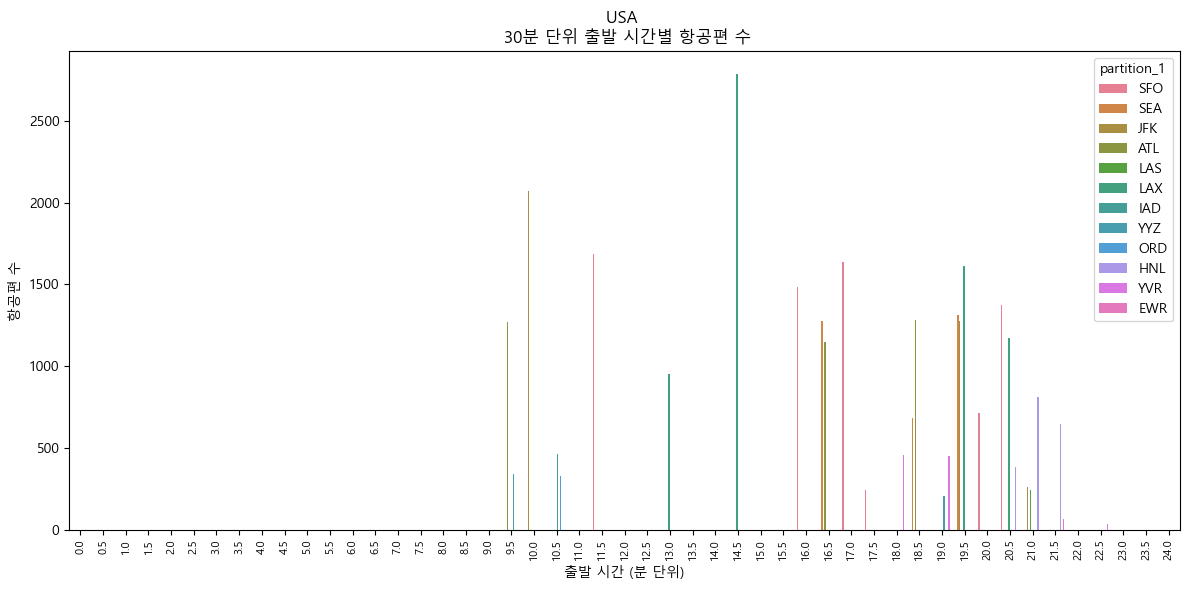

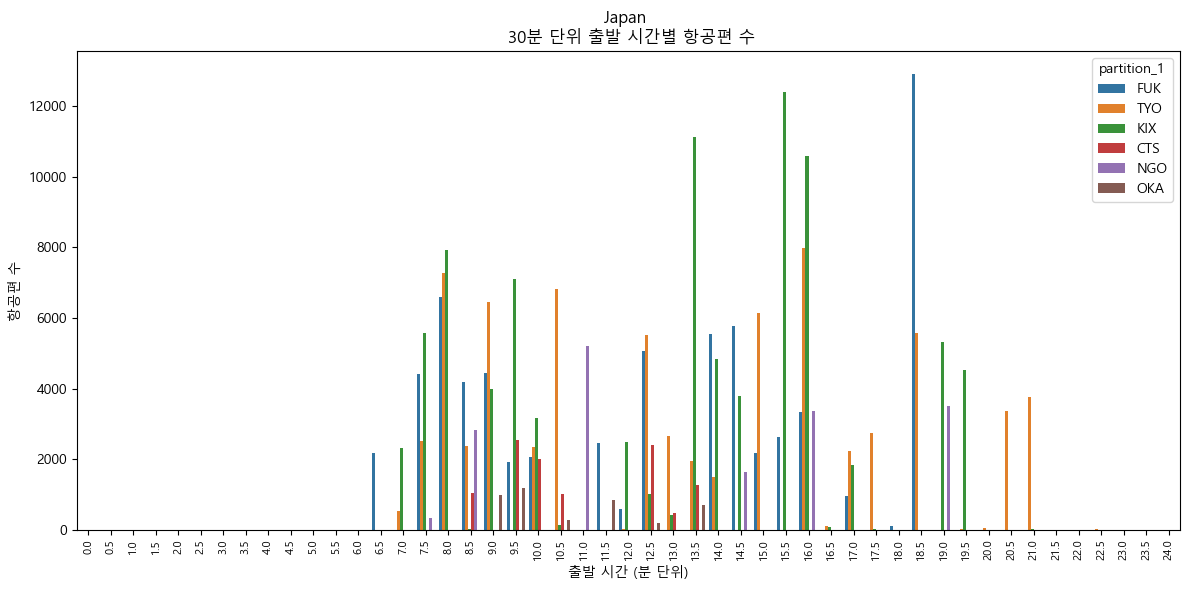

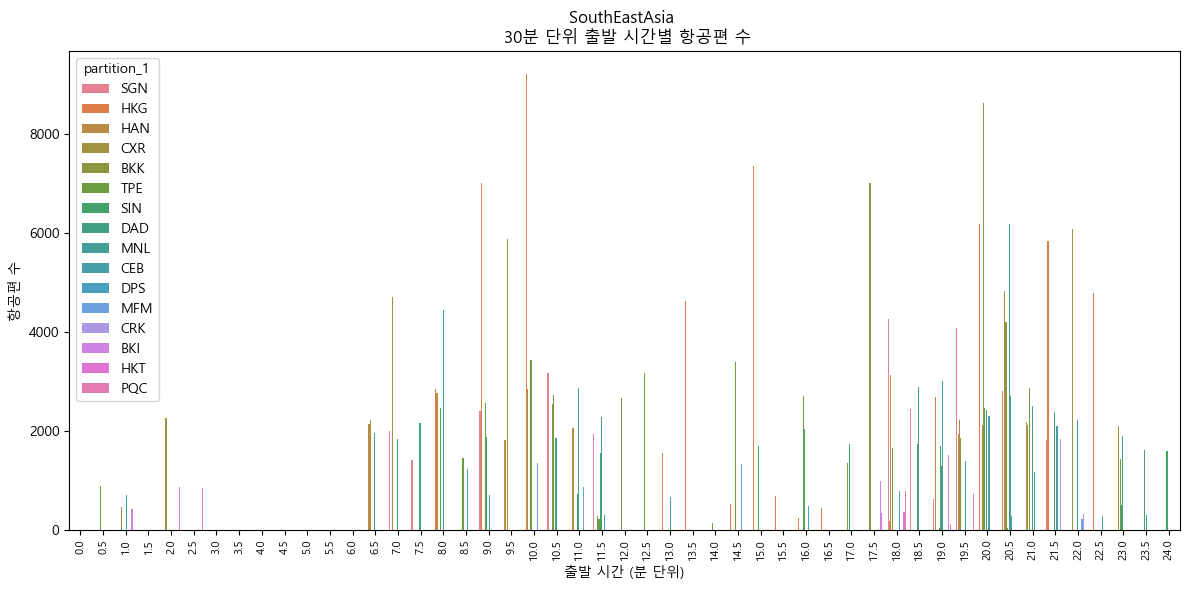

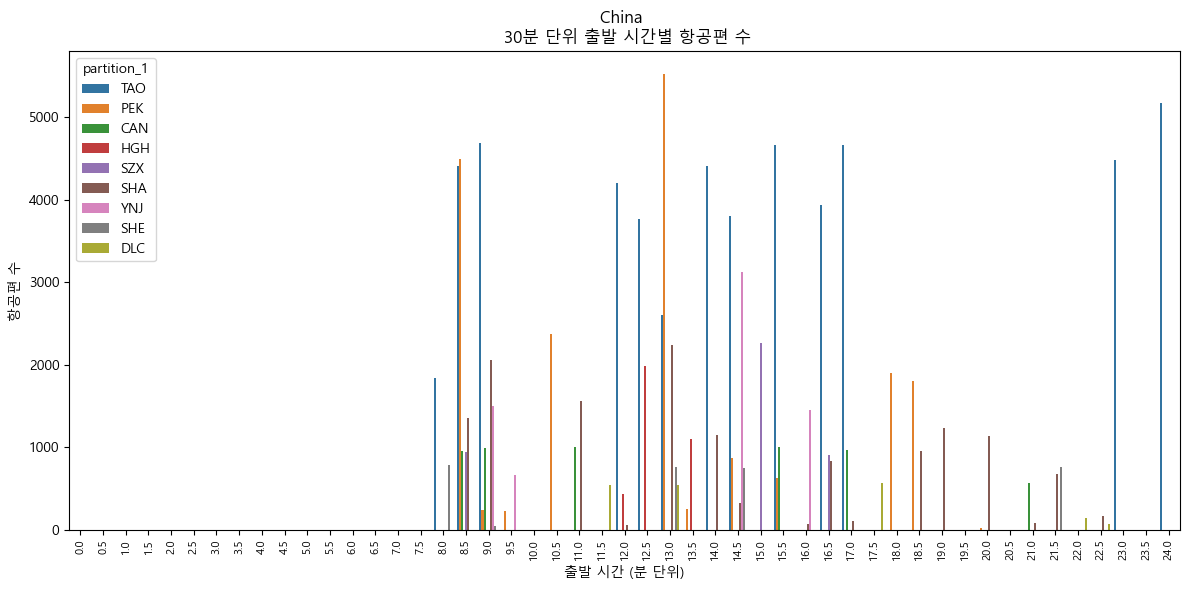

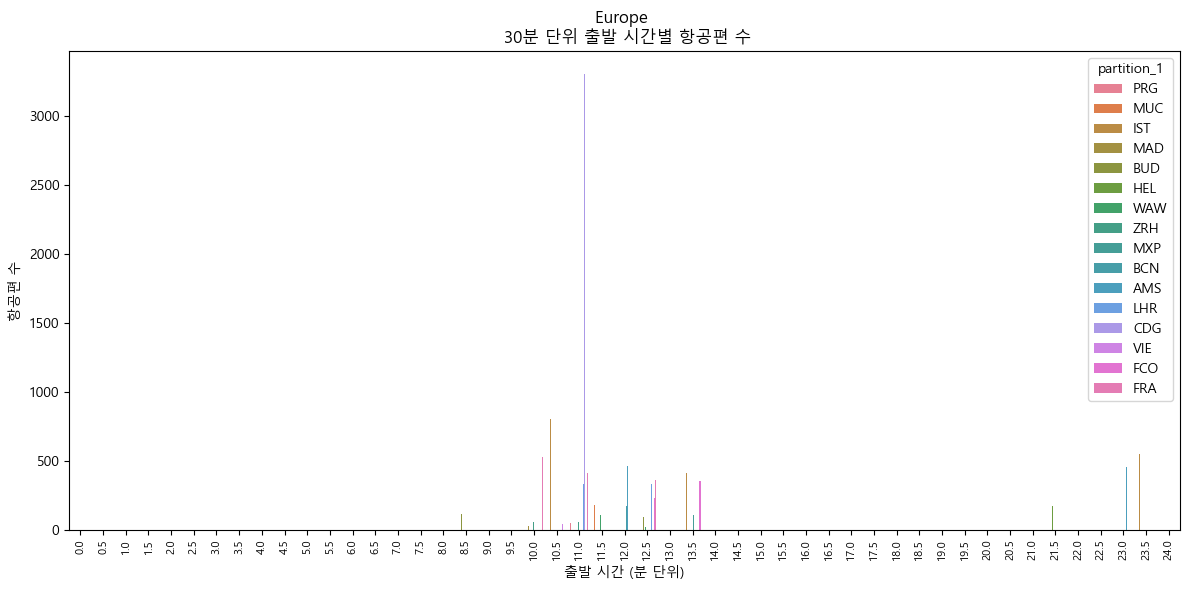

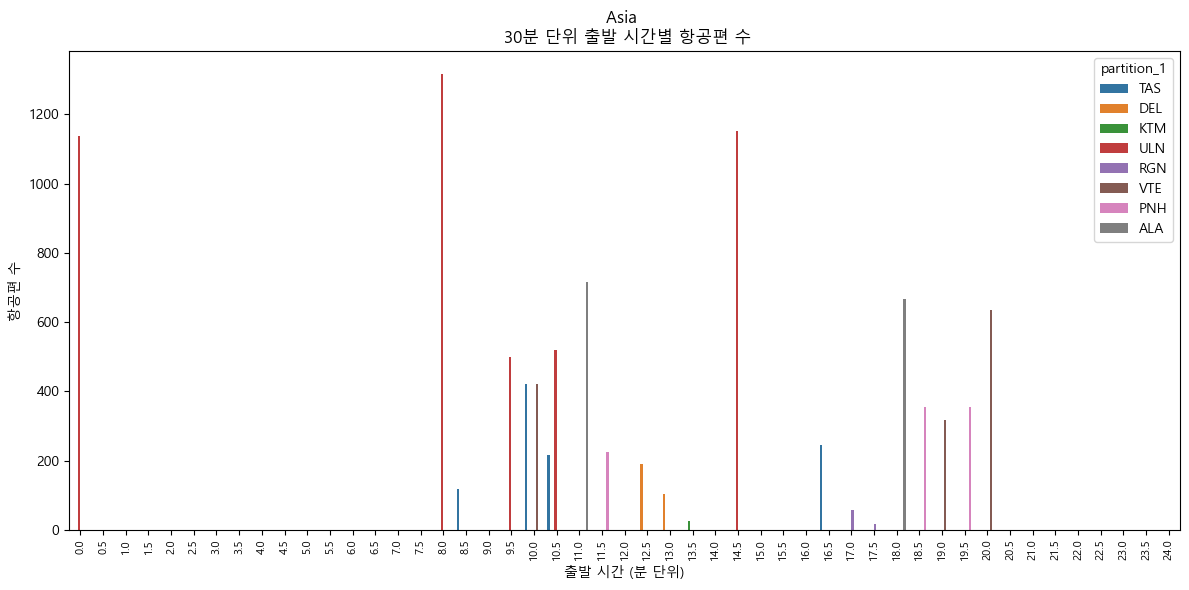

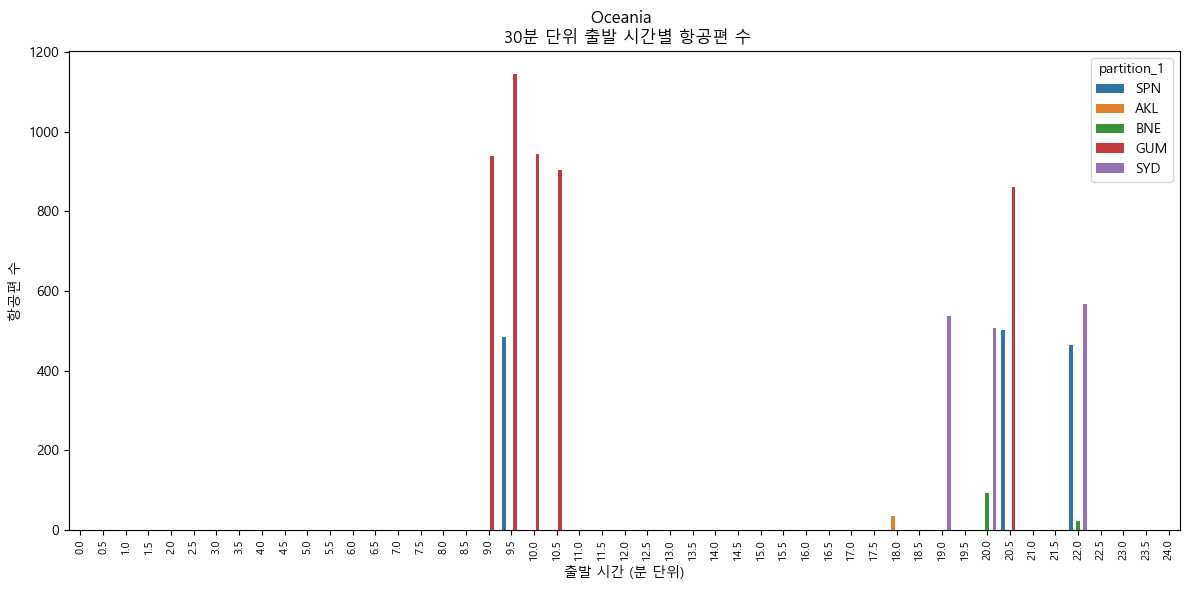

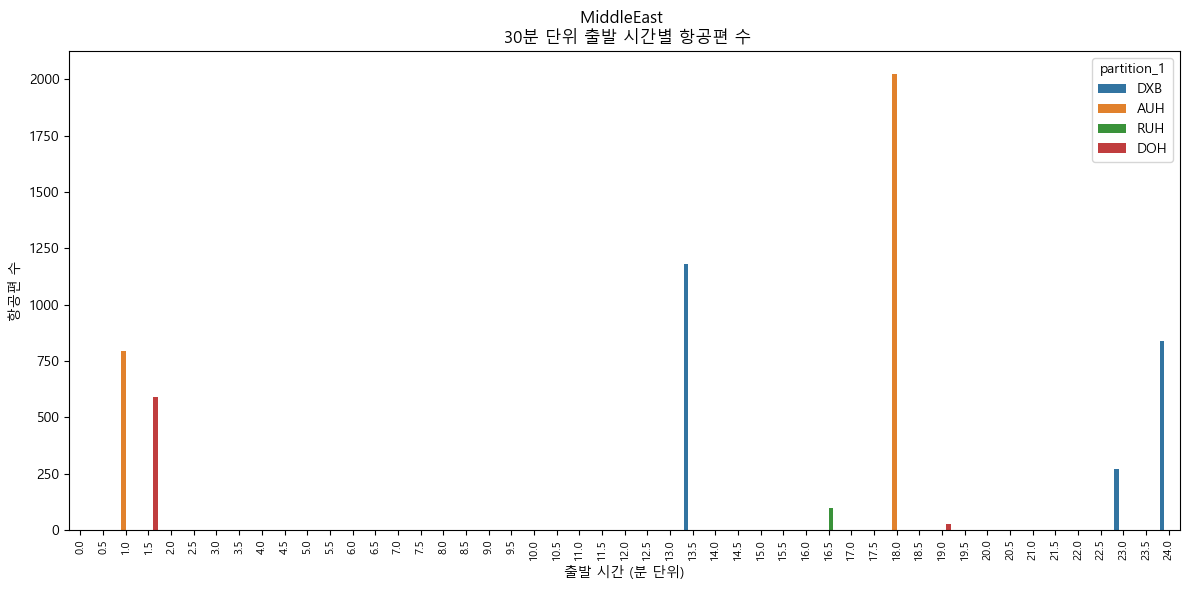

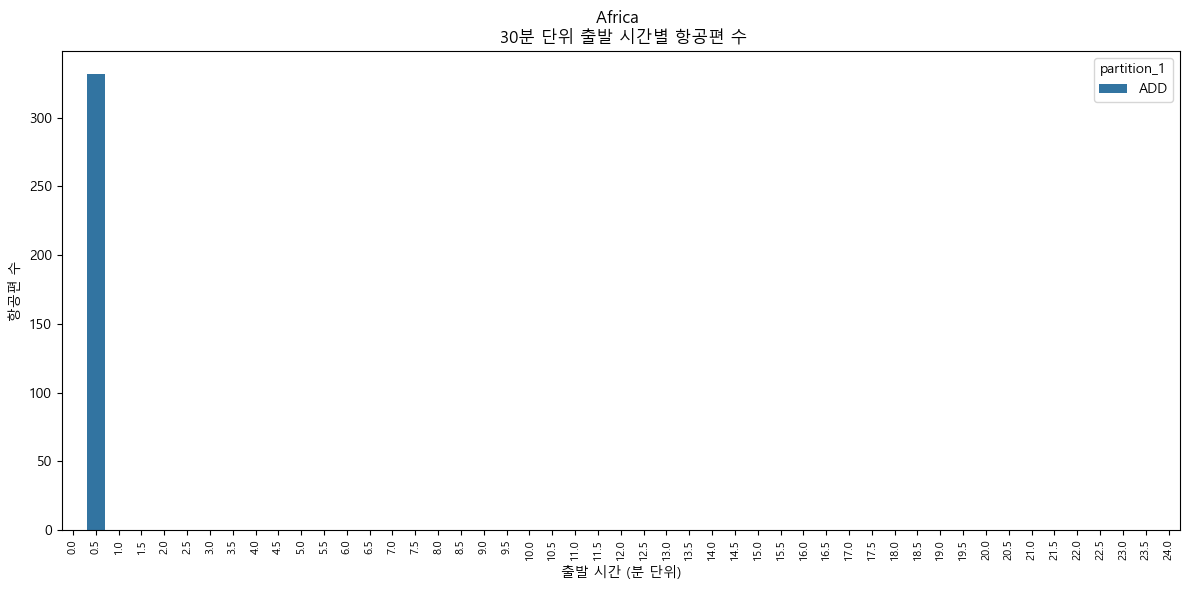

In [8]:
for region in merged_df['partition_0'].unique():
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='hours', y='cnt',hue='partition_1', data=merged_df.loc[merged_df['partition_0']==region])
    plt.xlabel('출발 시간 (분 단위)')
    plt.ylabel('항공편 수')
    plt.title(f'{region} \n 30분 단위 출발 시간별 항공편 수')
    plt.xticks(rotation=90, size=8)
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

In [15]:

# 그룹화 및 정렬
df = data.groupby(['partition_0', 'partition_1', 'arr_sdt_hours'])['dep_week'].count().reset_index().sort_values(['partition_1', 'arr_sdt_hours'])
df.columns = ['partition_0', 'partition_1', 'hours', 'cnt']

# 가능한 모든 시간을 포함하는 리스트 생성
hours = np.arange(0, 24.5, 0.5)

# partition_0과 partition_1의 고유한 조합 추출
unique_combinations = data[['partition_0', 'partition_1']].drop_duplicates()

# 가능한 모든 조합을 포함하는 데이터프레임 생성
full_combinations_list = []
for _, row in unique_combinations.iterrows():
    for hour in hours:
        full_combinations_list.append({'partition_0': row['partition_0'], 'partition_1': row['partition_1'], 'hours': hour})

full_combinations = pd.DataFrame(full_combinations_list)

# 병합 및 누락된 값을 0으로 채움
merged_df = pd.merge(full_combinations, df, on=['partition_0', 'partition_1', 'hours'], how='left').fillna(0)

# 'cnt' 열을 정수형으로 변환
merged_df['cnt'] = merged_df['cnt'].astype(int)

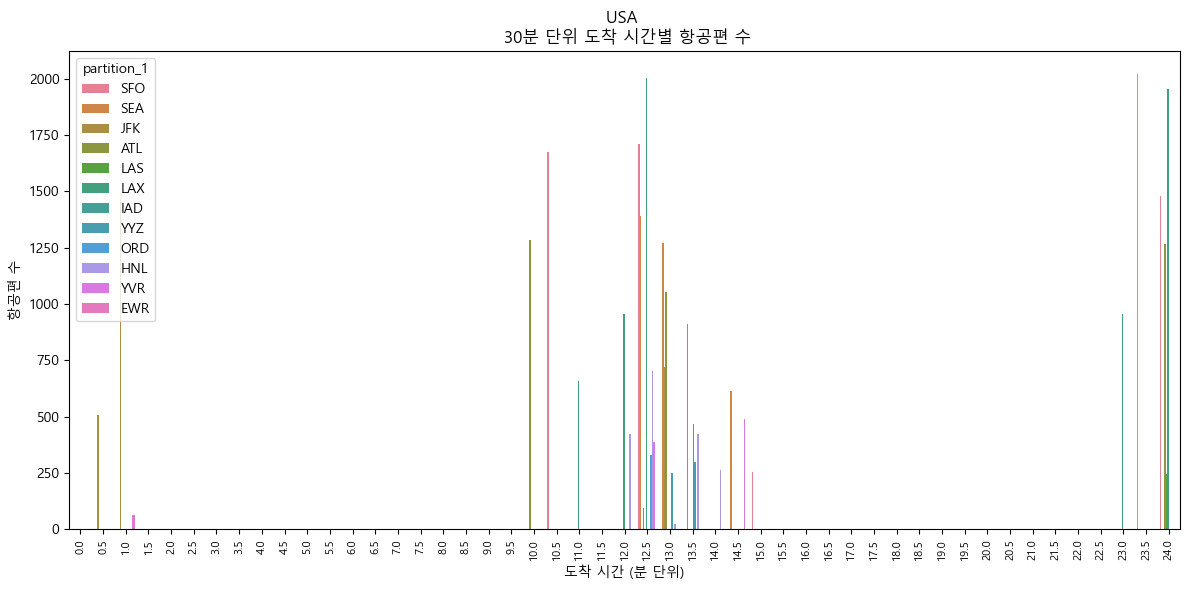

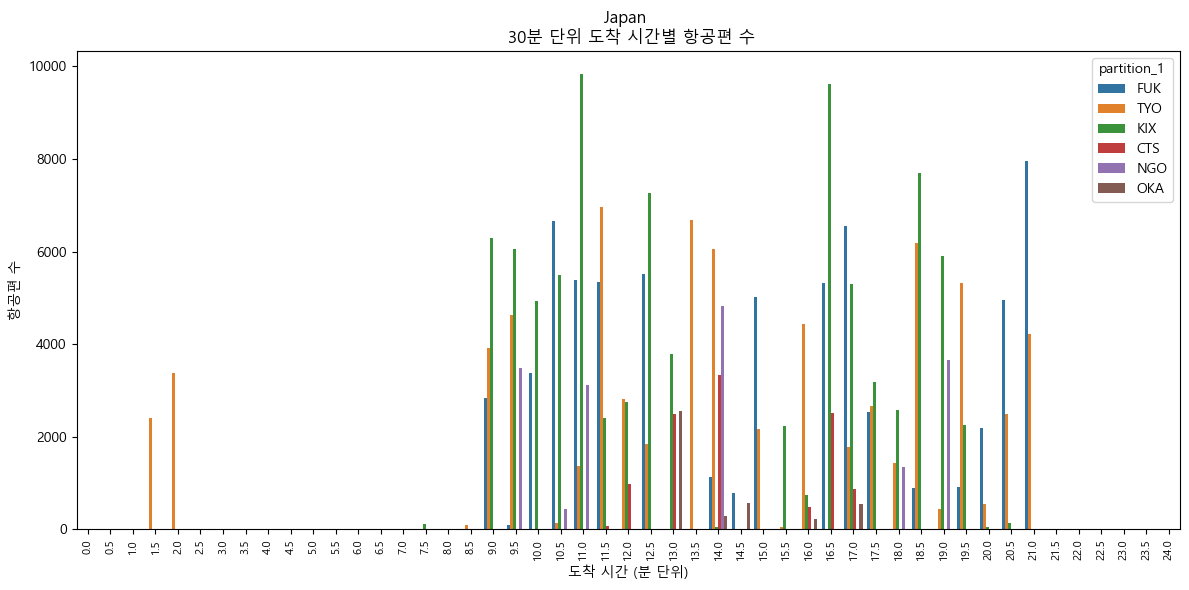

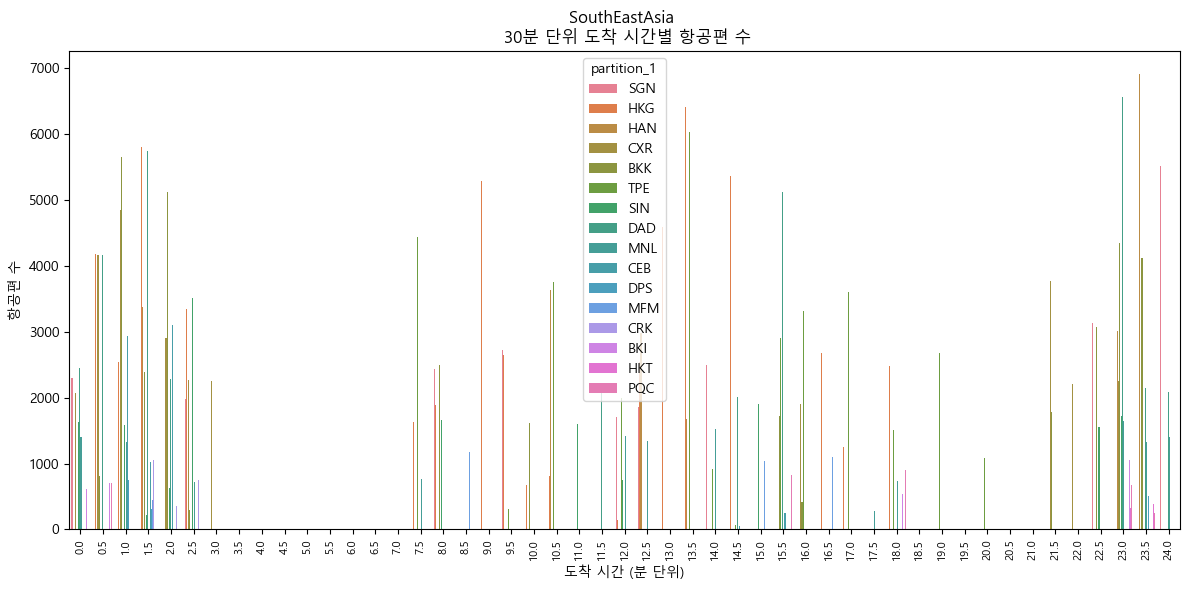

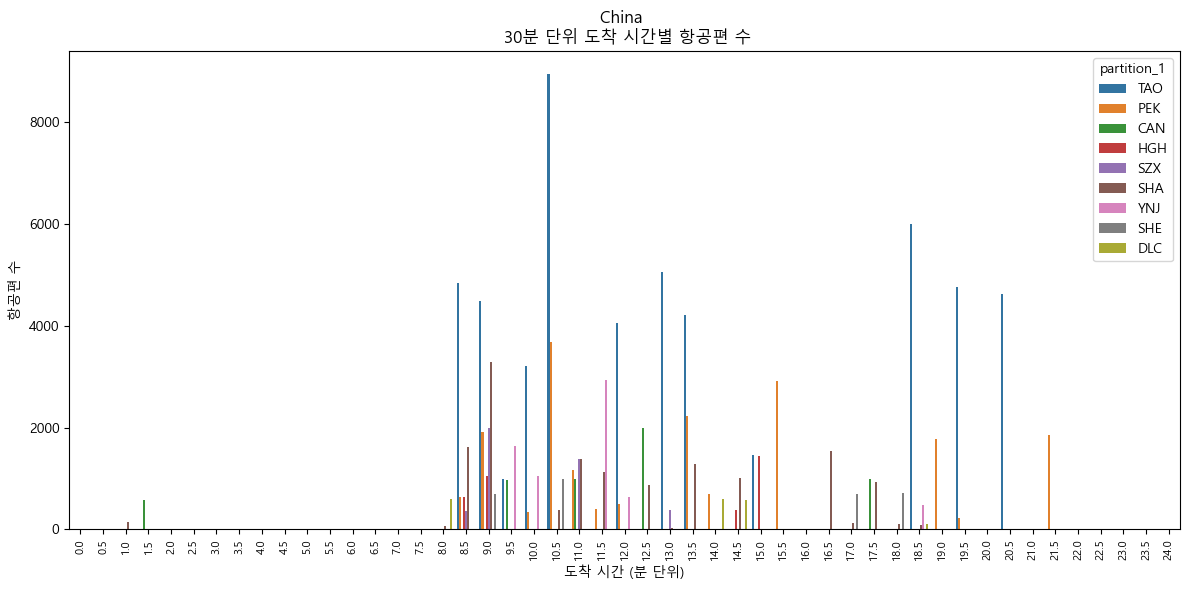

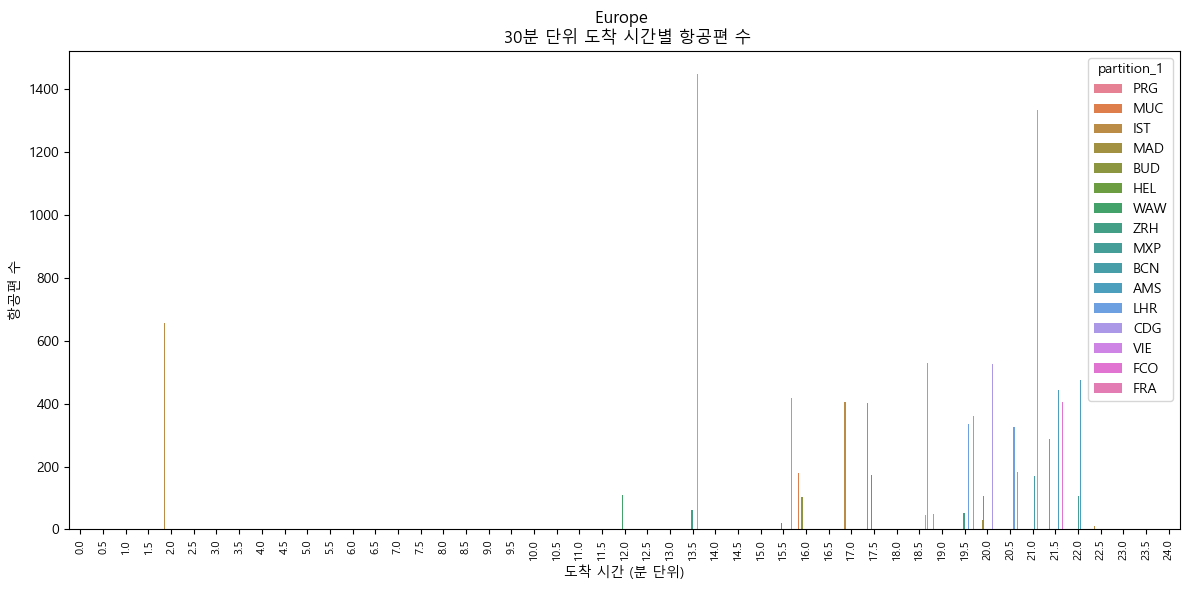

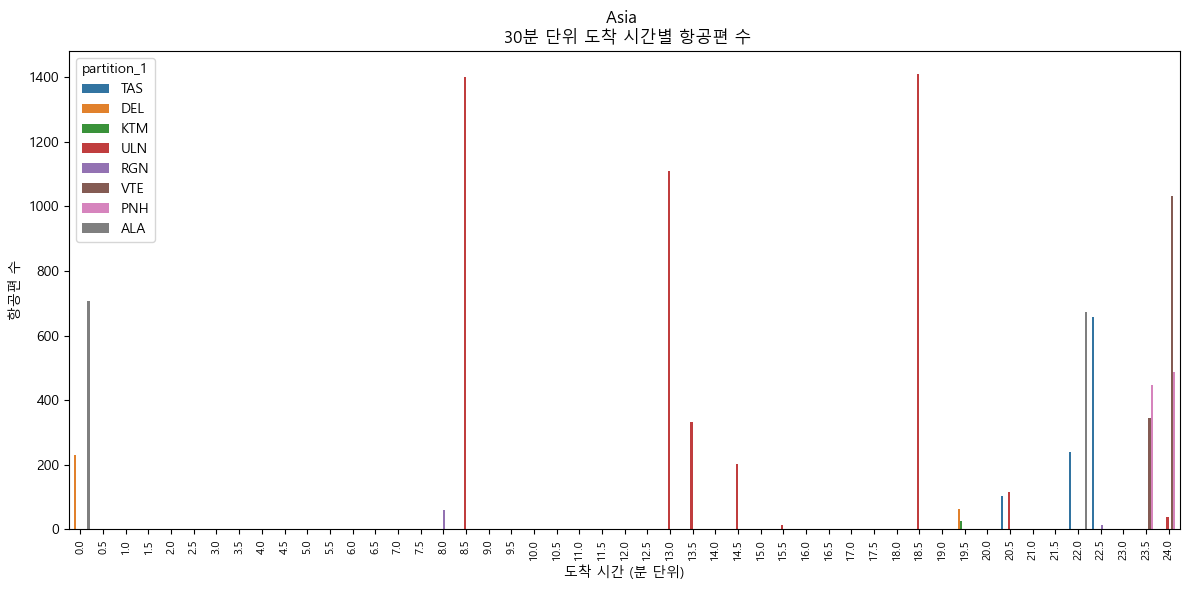

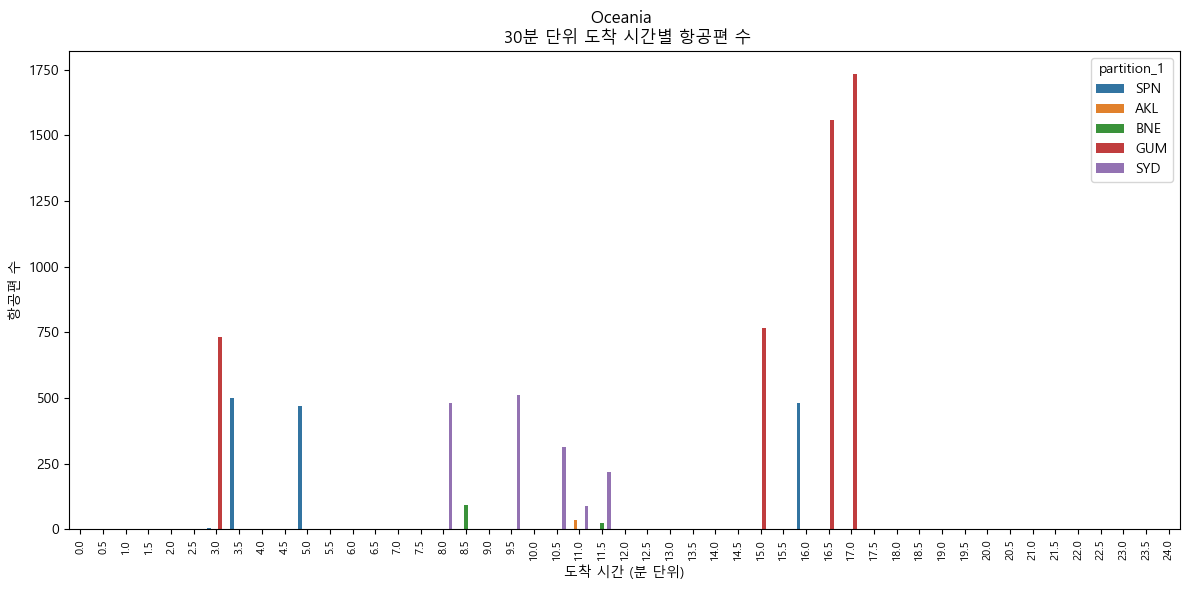

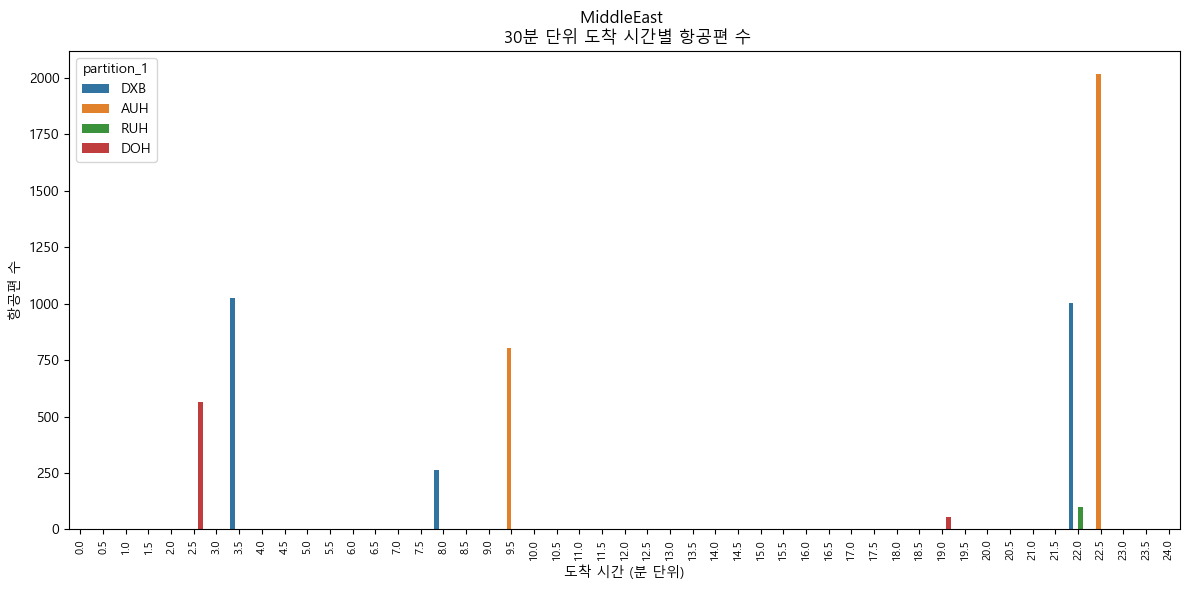

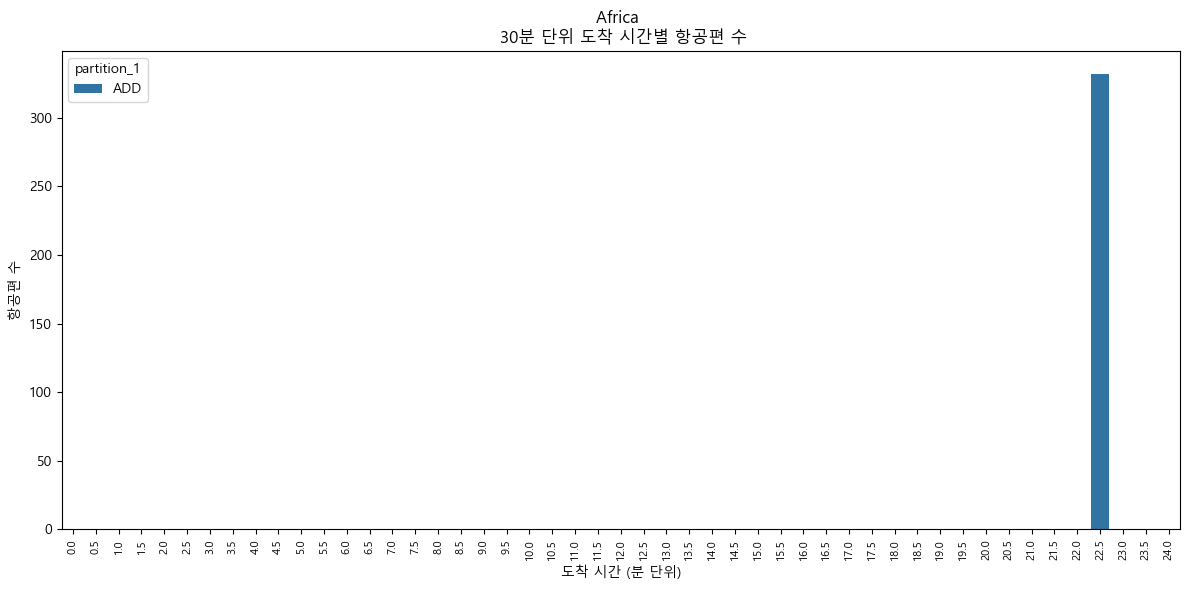

In [16]:
for region in merged_df['partition_0'].unique():
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='hours', y='cnt',hue='partition_1', data=merged_df.loc[merged_df['partition_0']==region])
    plt.xlabel('도착 시간 (분 단위)')
    plt.ylabel('항공편 수')
    plt.title(f'{region} \n 30분 단위 도착 시간별 항공편 수')
    plt.xticks(rotation=90, size=8)
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

## 출발 도착 시간 별 항공권 가격

In [24]:
data

df = data.groupby(['partition_0', 'partition_1', 'dep_sdt_hours'])['total_fare'].mean().reset_index().sort_values(['partition_1', 'total_fare'])
df.columns = ['partition_0', 'partition_1', 'hours', 'avg_fare']

# 가능한 모든 시간을 포함하는 리스트 생성
hours = np.arange(0, 24.5, 0.5)

# partition_0과 partition_1의 고유한 조합 추출
unique_combinations = data[['partition_0', 'partition_1']].drop_duplicates()

# 가능한 모든 조합을 포함하는 데이터프레임 생성
full_combinations_list = []
for _, row in unique_combinations.iterrows():
    for hour in hours:
        full_combinations_list.append({'partition_0': row['partition_0'], 'partition_1': row['partition_1'], 'hours': hour})

full_combinations = pd.DataFrame(full_combinations_list)

# 병합 및 누락된 값을 0으로 채움
merged_df = pd.merge(full_combinations, df, on=['partition_0', 'partition_1', 'hours'], how='left').fillna(0)

# 'cnt' 열을 정수형으로 변환
merged_df['avg_fare'] = merged_df['avg_fare'].astype(int)

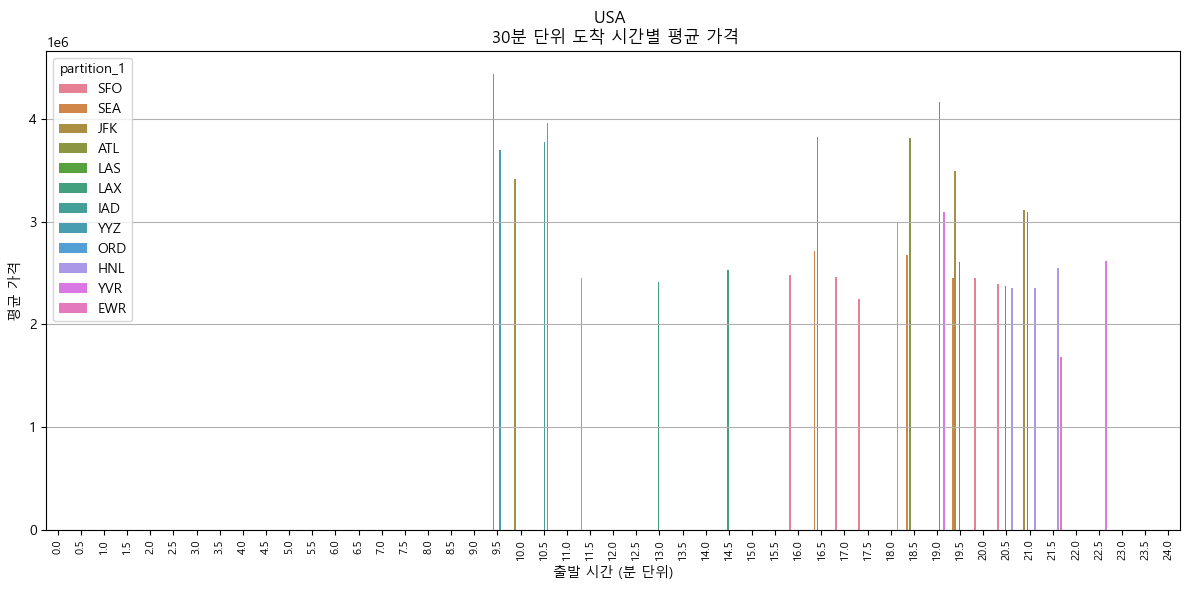

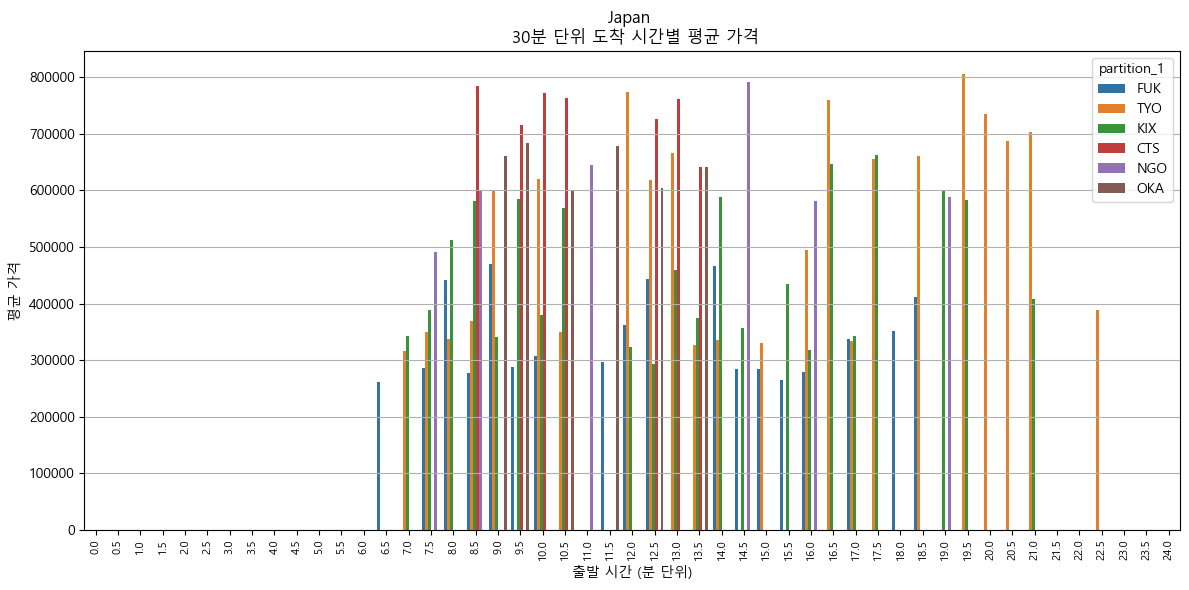

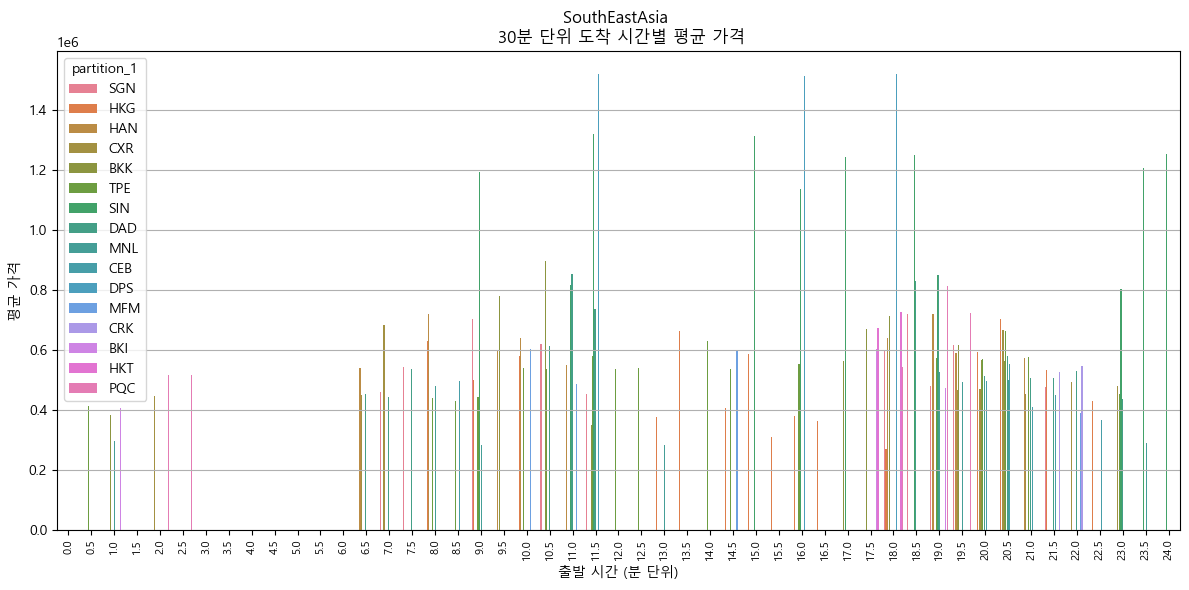

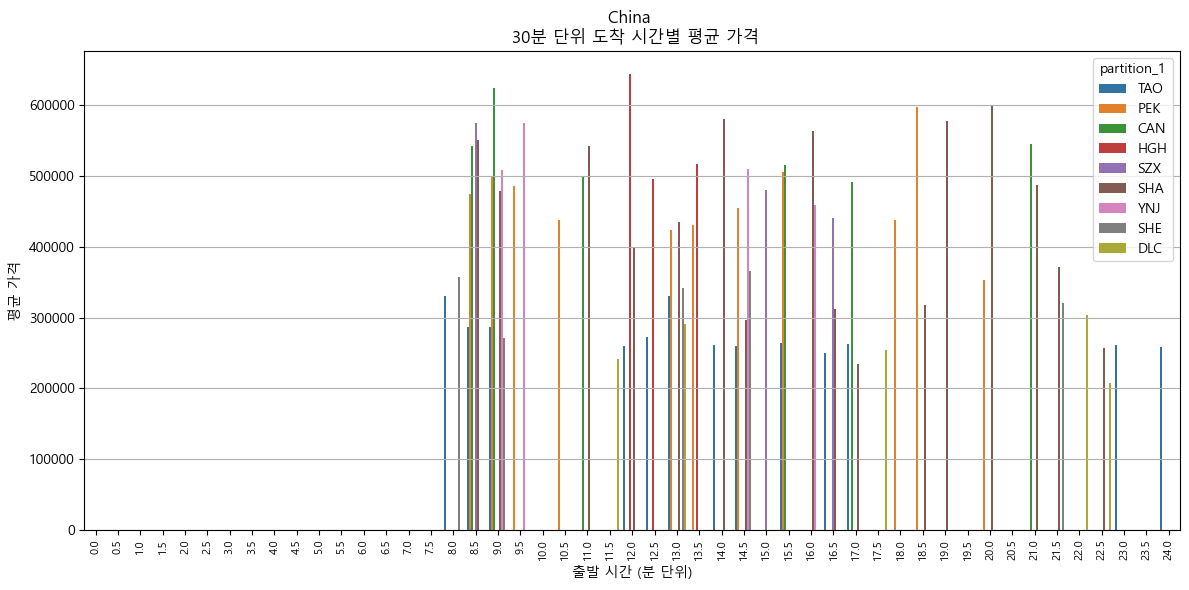

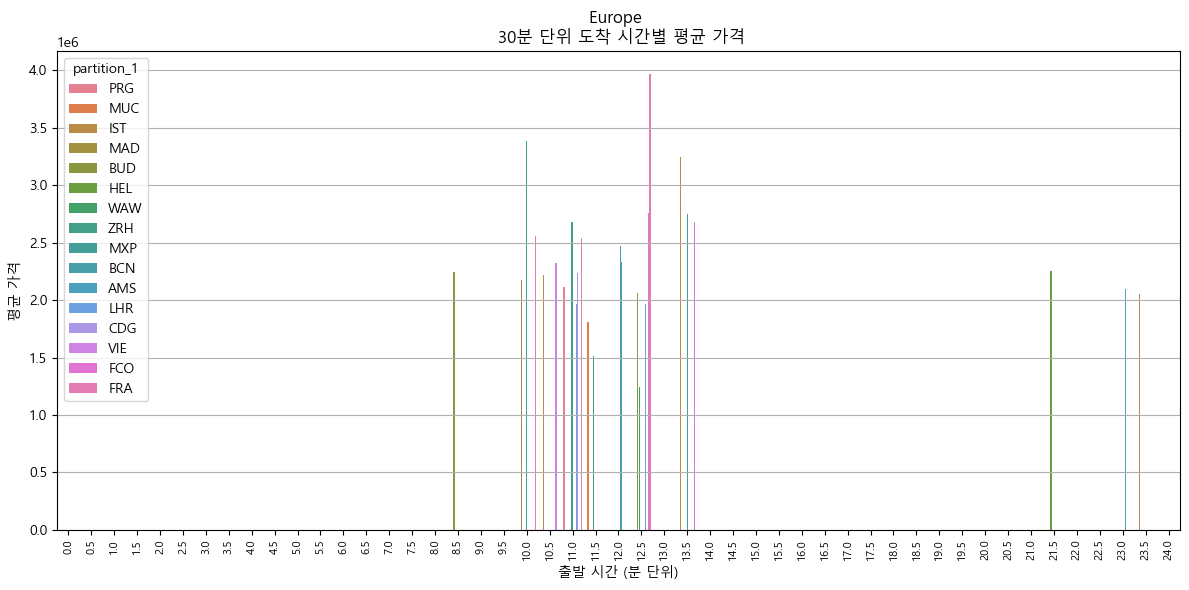

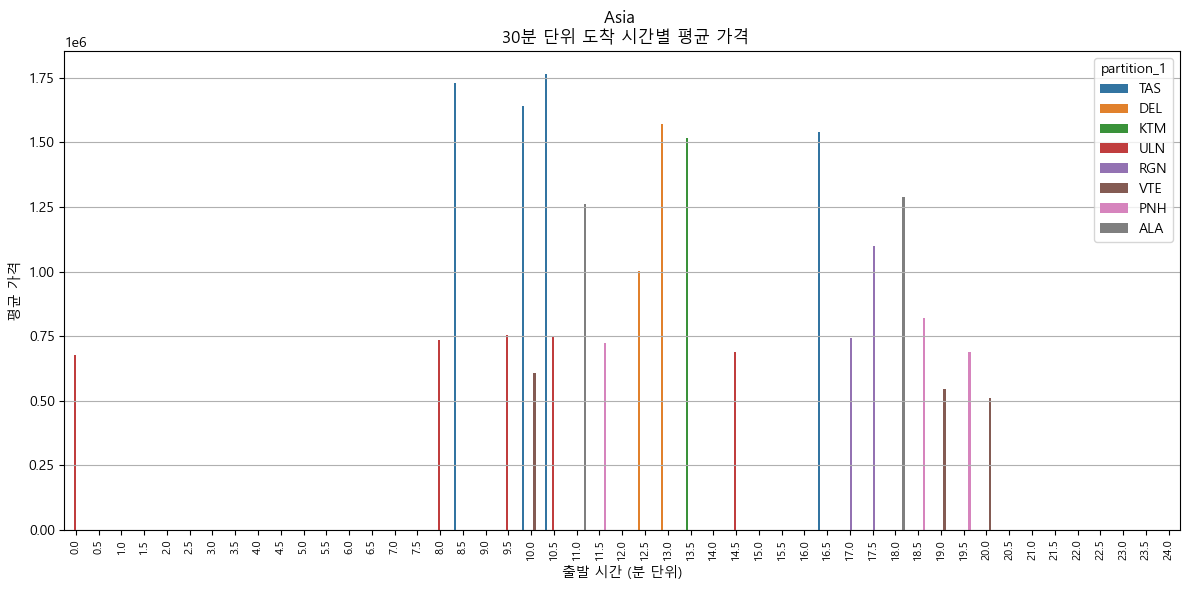

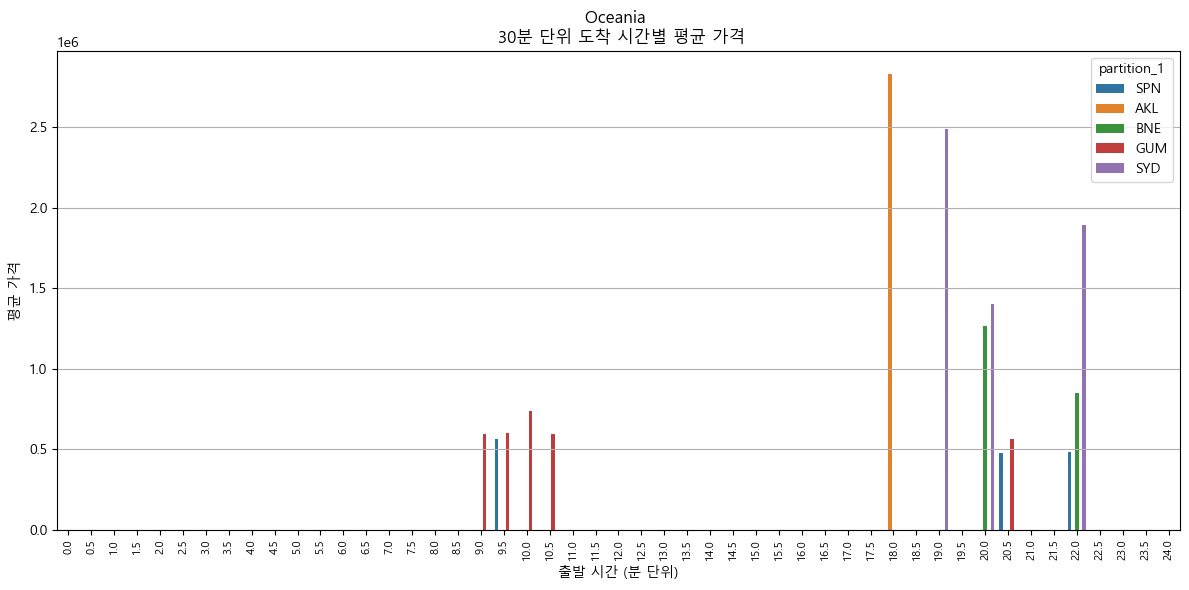

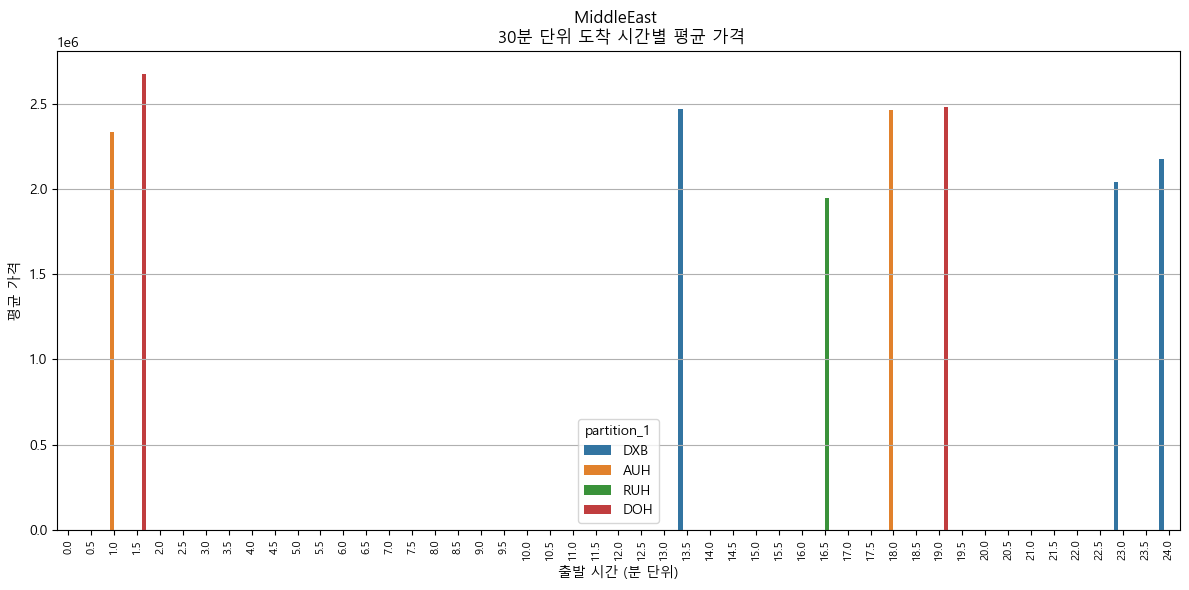

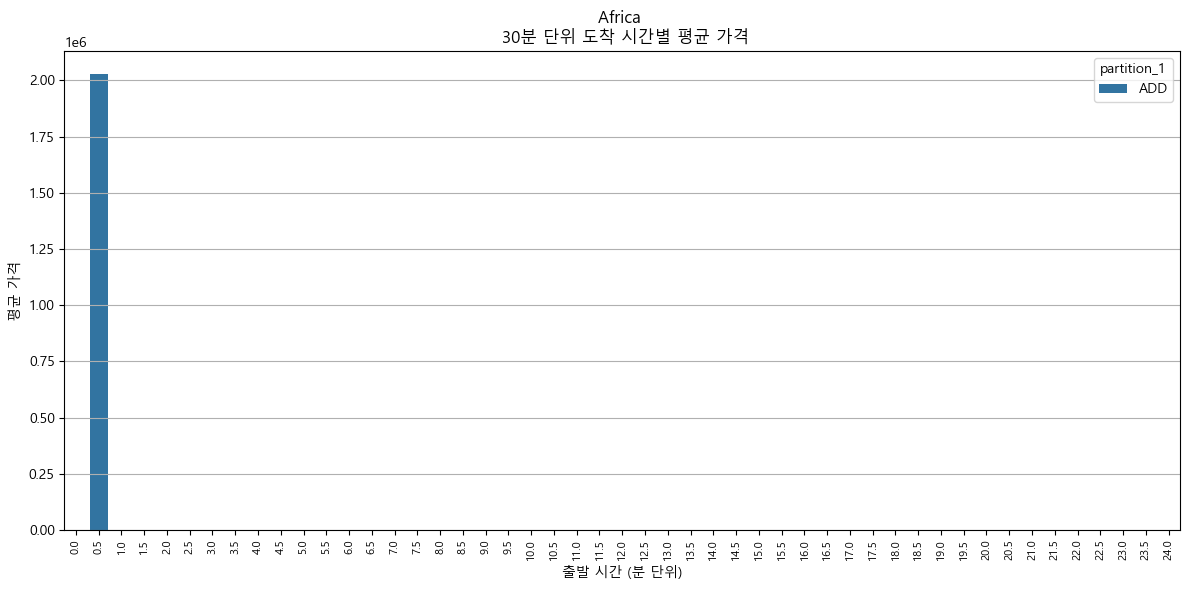

In [26]:
for region in merged_df['partition_0'].unique():
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='hours', y='avg_fare',hue='partition_1', data=merged_df.loc[merged_df['partition_0']==region])
    plt.xlabel('출발 시간 (분 단위)')
    plt.ylabel('평균 가격')
    plt.title(f'{region} \n 30분 단위 도착 시간별 평균 가격')
    plt.xticks(rotation=90, size=8)
    plt.tight_layout()
    plt.grid(axis='y')

    # 그래프 보여주기
    plt.show()

In [14]:
d_data = pd.read_csv('./data/직항_머신러닝.csv')
d_data.head()

,nights,departure_sdt,departure_jt,dep_week,arrival_sdt,arrival_jt,arr_week,agentcode,partition_0,partition_1,time_zone,baggagetype,total_fare
0,2,2024-05-18 14:45:00.000,350,6,2024-05-20 08:55:00.000,350,1,WHY002,SouthEastAsia,HKG,Asia/Hong_Kong,C,249700
1,2,2024-05-18 12:45:00.000,345,6,2024-05-20 07:15:00.000,335,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
2,2,2024-05-18 12:45:00.000,345,6,2024-05-20 10:40:00.000,340,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
3,2,2024-05-18 14:35:00.000,345,6,2024-05-20 07:15:00.000,335,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
4,2,2024-05-18 14:35:00.000,345,6,2024-05-20 10:40:00.000,340,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600


In [25]:
from copy import copy

def preprocessing(df,sincos=False):
    df = df.copy()
    
    # str to datetime 형식 변환
    df['departure_sdt'] = pd.to_datetime(df['departure_sdt'])
    df['arrival_sdt'] = pd.to_datetime(df['arrival_sdt'])

    # 시간 분 추출
    df['departure_hour'] = df['departure_sdt'].apply(lambda x: x.hour)
    df['departure_minute'] = df['departure_sdt'].apply(lambda x: x.minute)
    df['arrival_hour'] = df['arrival_sdt'].apply(lambda x: x.hour)
    df['arrival_minute'] = df['arrival_sdt'].apply(lambda x: x.minute)
    
    # jt 비행시간 350은 03시간50분으로 230분으로 변환
    df['departure_jt'] = df['departure_jt'].apply(lambda x : str(x).zfill(4)).apply(lambda x : int(x[:2])*60+int(x[2:]))
    df['arrival_jt'] = df['arrival_jt'].apply(lambda x : str(x).zfill(4)).apply(lambda x : int(x[:2])*60+int(x[2:]))

    if sincos:
        # 출발 도착 시각(하루 1440분 기준) sin cos 변환
        df['departure_time_sin'] = np.sin(2 * np.pi * (df['departure_hour']*60 + df['departure_minute']) / 1440)
        df['departure_time_cos'] = np.cos(2 * np.pi * (df['departure_hour']*60 + df['departure_minute']) / 1440)
        df['arrival_time_sin'] = np.sin(2 * np.pi * (df['arrival_hour']*60 + df['arrival_minute']) / 1440)
        df['arrival_time_cos'] = np.cos(2 * np.pi * (df['arrival_hour']*60 + df['arrival_minute']) / 1440)

        # 출발 도착 요일 sin cos 변환
        df['dep_week_sin'] = np.sin(2 * np.pi * df['dep_week'] / 7)
        df['dep_week_cos'] = np.cos(2 * np.pi * df['dep_week'] / 7)
        df['arr_week_sin'] = np.sin(2 * np.pi * df['arr_week'] / 7)
        df['arr_week_cos'] = np.cos(2 * np.pi * df['arr_week'] / 7)
        
        drop_col = ['departure_sdt','arrival_sdt',
                    'departure_hour','departure_minute','arrival_hour','arrival_minute',
                    'dep_week', 'arr_week']
        df.drop(columns=drop_col,inplace=True)
    else:
        drop_col = ['departure_sdt','arrival_sdt','dep_week', 'arr_week']
        df.drop(columns=drop_col,inplace=True)

    return df

df = preprocessing(d_data)

In [28]:
df.groupby(['partition_1','nights']).first()

departure_jt  arrival_jt agentcode partition_0  \
partition_1 nights                                                   
ADD         1                790         685    HAT004      Africa   
            2                790         685    HAT004      Africa   
            3                790         685    TOV025      Africa   
            4                790         685    HAT004      Africa   
            5                790         685    HAT004      Africa   
...                          ...         ...       ...         ...   
ZRH         2                835         705    TOV025      Europe   
            3                800         695    WHY002      Europe   
            4                835         705    TOV025      Europe   
            5                800         695    LTT017      Europe   
            6                835         705    TOV025      Europe   

                             time_zone baggagetype  total_fare  \
partition_1 nights                                               
ADD         1       Africa/Addis_Ababa           F     2072700   
            2       Africa/Addis_Ababa           F     2425900   
            3       Africa/Addis_Ababa           F     7212800   
            4       Africa/Addis_Ababa           F     2009300   
            5       Africa/Addis_Ababa           F     2376500   
...                                ...         ...         ...   
ZRH         2            Europe/Zurich           F     1712797   
            3            Europe/Zurich           F     1681000   
            4            Europe/Zurich           F     1318230   
            5            Europe/Zurich           F     1930500   
            6            Europe/Zurich           F     1490387   

                    departure_hour  departure_minute  arrival_hour  \
partition_1 nights                                                   
ADD         1                    0                35            22   
            2                    0                35            22   
            3                    0                35            22   
            4                    0                35            22   
            5                    0                35            22   
...                            ...               ...           ...   
ZRH         2                    9                55            13   
            3                   11                 5            19   
            4                    9                55            13   
            5                   11                 5            19   
            6                    9                55            13   

                    arrival_minute  
partition_1 nights                  
ADD         1                   35  
            2                   35  
            3                   35  
            4                   35  
            5                   35  
...                            ...  
ZRH         2                   40  
            3                   15  
            4                   40  
            5                   15  
            6                   40  

[456 rows x 11 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('./data/직항_30분단위_대륙별_가격.csv')

n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))#, sharex=True

for i, partition in enumerate(df):
    row = i // n_cols
    col = i % n_cols
    
    # 각 시간 간격별로 항공권 가격 데이터 추출
    data_to_plot = [df[partition].loc[df[partition]['dep_sdt_30min_formatted'] == time_interval, 'total_fare'].values for time_interval in time_intervals]
    
    # Boxplot 그리기
    axes[row, col].boxplot(data_to_plot, positions=range(len(time_intervals)), patch_artist=True)
    axes[row, col].set_ylabel('항공권 가격')
    axes[row, col].set_title(f'{partition} 출발 시간별 항공권 가격 분포')
    axes[row, col].set_xticks(range(len(time_intervals)))
    axes[row, col].set_xticklabels(time_intervals, rotation=90, size=8)
    axes[row, col].grid(True)
    
plt.tight_layout()
plt.show()
